# Model: K Nearest Neighbors

### Importing Libraries

In [1]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### Loading in Data

In [2]:
df = pd.read_excel('../top10_features.xlsx')
df = df.drop(df.columns[0], axis = 1)

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Splitting the Data

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Helper Functions

#### Function for plotting confusion matrix

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

## Modeling
The preferred evaluation metric used will be __Precision__ for each class.  They will be optimized using the __F1 Score-Macro-Average__ to balance the Precision and Recall.  This is done because we want to not only be correct when predicting but also make a decent amount of predictions for each class.  Classes such as 'Buy' and 'Sell' are more important than 'Hold'.

### Fitting and Training

In [6]:
# Importing the model
from sklearn.neighbors import KNeighborsClassifier

# Fitting and training
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Printing out Evaluation Metrics

In [7]:
# Classifier predictions
pred = clf.predict(X_test)

#Printing out results
report = classification_report(y_test, pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.43      0.33      0.38         9
         Buy       0.29      0.29      0.29         7
        Hold       0.00      0.00      0.00         1

    accuracy                           0.29        17
   macro avg       0.24      0.21      0.22        17
weighted avg       0.34      0.29      0.32        17



### Confusion Matrix

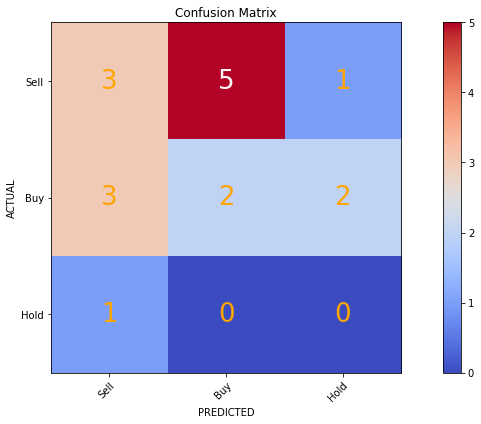

In [8]:
plot_confusion_matrix(y_test, pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

## Tuning Model Parameters

In [9]:
from sklearn.model_selection import GridSearchCV

### Parameters

In [12]:
# Parameters to Tune
params = {"n_neighbors": [10, 15],
          "weights": ['uniform', 'distance'],
          "p": [1,2]}

In [13]:
search = GridSearchCV(clf, params, cv=3, return_train_score=True, verbose=5, scoring='f1_macro')

search.fit(X,y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] n_neighbors=10, p=1, weights=uniform ............................
[CV]  n_neighbors=10, p=1, weights=uniform, score=(train=0.354, test=0.372), total=   0.0s
[CV] n_neighbors=10, p=1, weights=uniform ............................
[CV]  n_neighbors=10, p=1, weights=uniform, score=(train=0.581, test=0.360), total=   0.0s
[CV] n_neighbors=10, p=1, weights=uniform ............................
[CV]  n_neighbors=10, p=1, weights=uniform, score=(train=0.610, test=0.403), total=   0.0s
[CV] n_neighbors=10, p=1, weights=distance ...........................
[CV]  n_neighbors=10, p=1, weights=distance, score=(train=1.000, test=0.327), total=   0.0s
[CV] n_neighbors=10, p=1, weights=distance ...........................
[CV]  n_neighbors=10, p=1, weights=distance, score=(train=1.000, test=0.430), total=   0.0s
[CV] n_neighbors=10, p=1, weights=distance ...........................
[CV]  n_neighbors=10, p=1, weights=distance, score=(train

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metric

[CV]  n_neighbors=10, p=2, weights=distance, score=(train=1.000, test=0.190), total=   0.0s
[CV] n_neighbors=10, p=2, weights=distance ...........................
[CV]  n_neighbors=10, p=2, weights=distance, score=(train=1.000, test=0.486), total=   0.0s
[CV] n_neighbors=15, p=1, weights=uniform ............................
[CV]  n_neighbors=15, p=1, weights=uniform, score=(train=0.355, test=0.099), total=   0.0s
[CV] n_neighbors=15, p=1, weights=uniform ............................
[CV]  n_neighbors=15, p=1, weights=uniform, score=(train=0.362, test=0.292), total=   0.0s
[CV] n_neighbors=15, p=1, weights=uniform ............................
[CV]  n_neighbors=15, p=1, weights=uniform, score=(train=0.385, test=0.240), total=   0.0s
[CV] n_neighbors=15, p=1, weights=distance ...........................
[CV]  n_neighbors=15, p=1, weights=distance, score=(train=1.000, test=0.138), total=   0.0s
[CV] n_neighbors=15, p=1, weights=distance ...........................
[CV]  n_neighbors=15, p=1

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  n_neighbors=15, p=2, weights=distance, score=(train=1.000, test=0.184), total=   0.0s
[CV] n_neighbors=15, p=2, weights=distance ...........................
[CV]  n_neighbors=15, p=2, weights=distance, score=(train=1.000, test=0.337), total=   0.0s


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [10, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1_macro', verbose=5)

### Tuned Results

In [14]:
print("Mean Training Score:", np.mean(search.cv_results_['mean_train_score']))
print("Mean Testing Score:", search.score(X, y))
print("\nBest Parameter Found:")
search.best_params_

Mean Training Score: 0.7079172203975561
Mean Testing Score: 1.0

Best Parameter Found:


{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

### Model with the Best Parameters

In [15]:
search_clf = search.best_estimator_

search_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                     weights='distance')

#### Results from Optimum Parameters

In [16]:
# Classifier predictions
s_pred = search_clf.predict(X_test)

#Printing out results
report = classification_report(y_test, s_pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.50      0.22      0.31         9
         Buy       0.17      0.14      0.15         7
        Hold       0.14      1.00      0.25         1

    accuracy                           0.24        17
   macro avg       0.27      0.46      0.24        17
weighted avg       0.34      0.24      0.24        17



### Confusion Matrix for Optimum Parameters

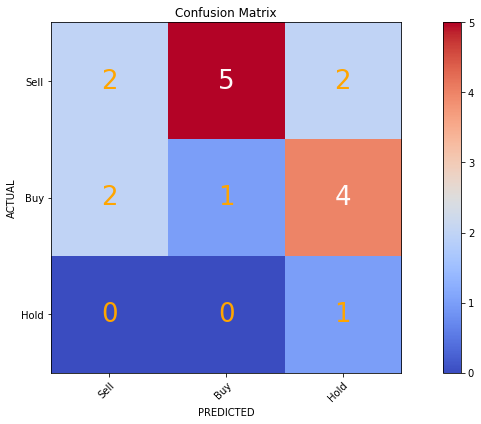

In [17]:
plot_confusion_matrix(y_test, s_pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()